# Flight Performance in US
BY Abdelrahman

## Investigation Overview

This investigation delves into flight performance data to identify the root causes of flight delays and evaluate carrier performance regarding cancellations and delays.

## Dataset Overview

The dataset, sourced from the Bureau of Transportation Statistics, encompasses information on flight delays and cancellations, including details about various carriers and destinations.  Retrieved from their official website in CSV format, the dataset spans a three-year period, from 2010 to 2020.  The analysis focuses on understanding trends and patterns within this timeframe.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import warnings


%matplotlib inline

In [2]:
df = pd.read_csv('airline_2m.csv', encoding='ISO-8859-1')
df = df[(df["Year"] >= 2010) & (df["Year"] <= 2020)]


C:\Users\MrBENZ\AppData\Local\Temp\ipykernel_2768\2668280548.py:1: DtypeWarning: Columns (69,76,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('airline_2m.csv', encoding='ISO-8859-1')


In [3]:
df.drop(columns= ["Div3WheelsOff", "Div3LongestGTime", 'Div3TailNum', "Div3AirportSeqID", "Div3WheelsOn", "Div3Airport", 'Div3AirportID',
                'Div3TotalGTime', 'Div4Airport', "Div4AirportID", "Div4AirportSeqID", "Div4WheelsOn",	"Div4TotalGTime",	
                "Div4LongestGTime",	"Div4WheelsOff",
                'Div1AirportSeqID', 'Div1WheelsOn', 'Div1TotalGTime',
                'Div1LongestGTime', 'Div1WheelsOff', 'Div1TailNum', 'Div2Airport',
                'Div2AirportID', 'Div2AirportSeqID', 'Div2WheelsOn', 'Div2TotalGTime',
                'Div2LongestGTime', 'Div2WheelsOff', 'Div2TailNum', 'Div4TailNum',
                'Div5Airport', 'Div5AirportID', 'Div5AirportSeqID', 'Div5WheelsOn',
                'Div5TotalGTime', 'Div5LongestGTime', 'Div5WheelsOff', 'Div5TailNum',
                'FirstDepTime', 'TotalAddGTime', 'LongestAddGTime',
                'DivAirportLandings', 'DivReachedDest', 'DivActualElapsedTime',
                'DivArrDelay', 'DivDistance', 'Div1Airport', 'Div1AirportID'], inplace = True)

## The Cancellation Landscape: Key Contributing Factors

Our investigation highlights carrier-related problems and adverse weather conditions as the most significant drivers of flight cancellations.

C:\Users\MrBENZ\AppData\Local\Temp\ipykernel_2768\1039995959.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Carrier', 'Weather', 'National Air System', 'Security'], fontsize=12)


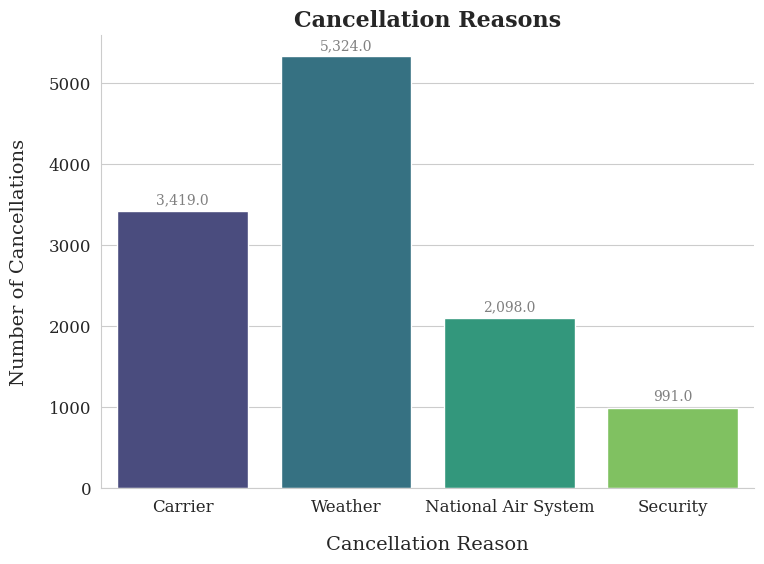

In [4]:
# Set a professional style
sns.set_style("whitegrid")  # Clean white grid
plt.rcParams['font.family'] = 'serif'  # Use serif font

# Choose a professional color palette
palette = sns.color_palette("viridis", 4)  # Or "cividis", "magma"

# Create the figure and axes (adjust size for better spacing)
fig, ax = plt.subplots(figsize=(8, 6))

# Define the plot with improved styling
g = sns.countplot(data=df, x='CancellationCode', hue='CancellationCode', palette=palette, order=['A', 'B', 'C', 'D'], ax=ax, legend=False)

# Update x-tick labels with increased font size
ax.set_xticklabels(['Carrier', 'Weather', 'National Air System', 'Security'], fontsize=12)

# Improved labels and title with increased font sizes and padding
ax.set_xlabel("Cancellation Reason", fontsize=14, labelpad=15)
ax.set_ylabel("Number of Cancellations", fontsize=14, labelpad=15)
ax.set_title('Cancellation Reasons', fontsize=16, fontweight='bold')


# Customize tick labels (increase font size)
ax.tick_params(axis='both', which='major', labelsize=12)

# Add annotations (values on bars) - Improved placement and formatting
for p in ax.patches:
    count = p.get_height()
    ax.annotate(f"{count:,}", (p.get_x() + p.get_width() / 2., count + 50), # Adjust offset as needed
                ha='center', va='bottom', fontsize=10, color='gray') # Added thousands separator to annotation

# Remove spines (optional - for a cleaner look)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Tight layout and show
plt.tight_layout(pad=2)
plt.show()

## Analysis of Carrier Cancellations: Top Performers

A comparative analysis of carrier cancellations reveals that Envoy Air (WN/EV) had the most cancellations, followed by SkyWest Airlines (OO) and American Airlines (AA).

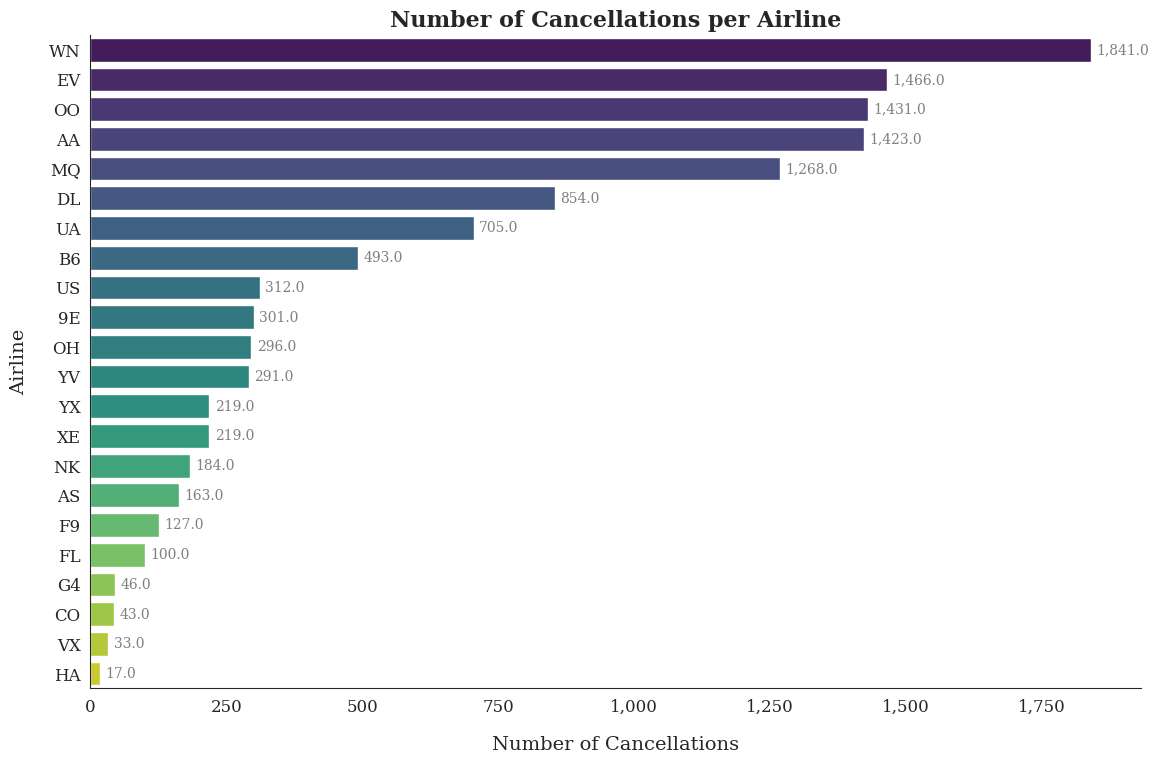

In [5]:
df_sub = df.query('CancellationCode in ["A","B","C","D"]')
carriers_cancellations = df_sub.Reporting_Airline.value_counts()

# Set a professional style
sns.set_style("white")
plt.rcParams['font.family'] = 'serif'

# Choose a professional color palette
palette = sns.color_palette("viridis", len(carriers_cancellations))  # Or "cividis", "magma"

# Create the figure and axes (adjust size for better label spacing)
fig, ax = plt.subplots(figsize=(12, 8))  # Wider figure

# Define the plot with improved styling (Horizontal Bar Chart)
sns.barplot(x=carriers_cancellations.values, 
            y=carriers_cancellations.index, 
            palette=palette, 
            hue=carriers_cancellations.index, # Add the hue argument!
            ax=ax,
            legend=False) # Horizontal

# Add thousands separators to x-axis for readability (if needed)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Improved labels and title with increased font sizes and padding
ax.set_xlabel("Number of Cancellations", fontsize=14, labelpad=15)
ax.set_ylabel("Airline", fontsize=14, labelpad=15)
ax.set_title('Number of Cancellations per Airline', fontsize=16, fontweight='bold')

# Customize tick labels (increase font size)
ax.tick_params(axis='both', which='major', labelsize=12)

# Add annotations (values on bars) - Improved placement and formatting
for p in ax.patches:
    count = p.get_width()
    ax.annotate(f"{count:,}", (count + 10, p.get_y() + p.get_height() / 2),  # Adjust offset as needed
                va='center', ha='left', fontsize=10, color='gray')  # Thousands separator in annotation

# Remove spines (optional - for a cleaner look)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Tight layout and show
plt.tight_layout(pad=2)
plt.show()

## Arrival Delays: Correlating with Cancellations?

A strong correlation appears to exist between cancellations and arrival delays.  Southwest Airlines (WN), the carrier with the highest number of cancellations, also experienced the most significant total arrival delay time, followed by SkyWest Airlines (OO) and Envoy Air (EV).

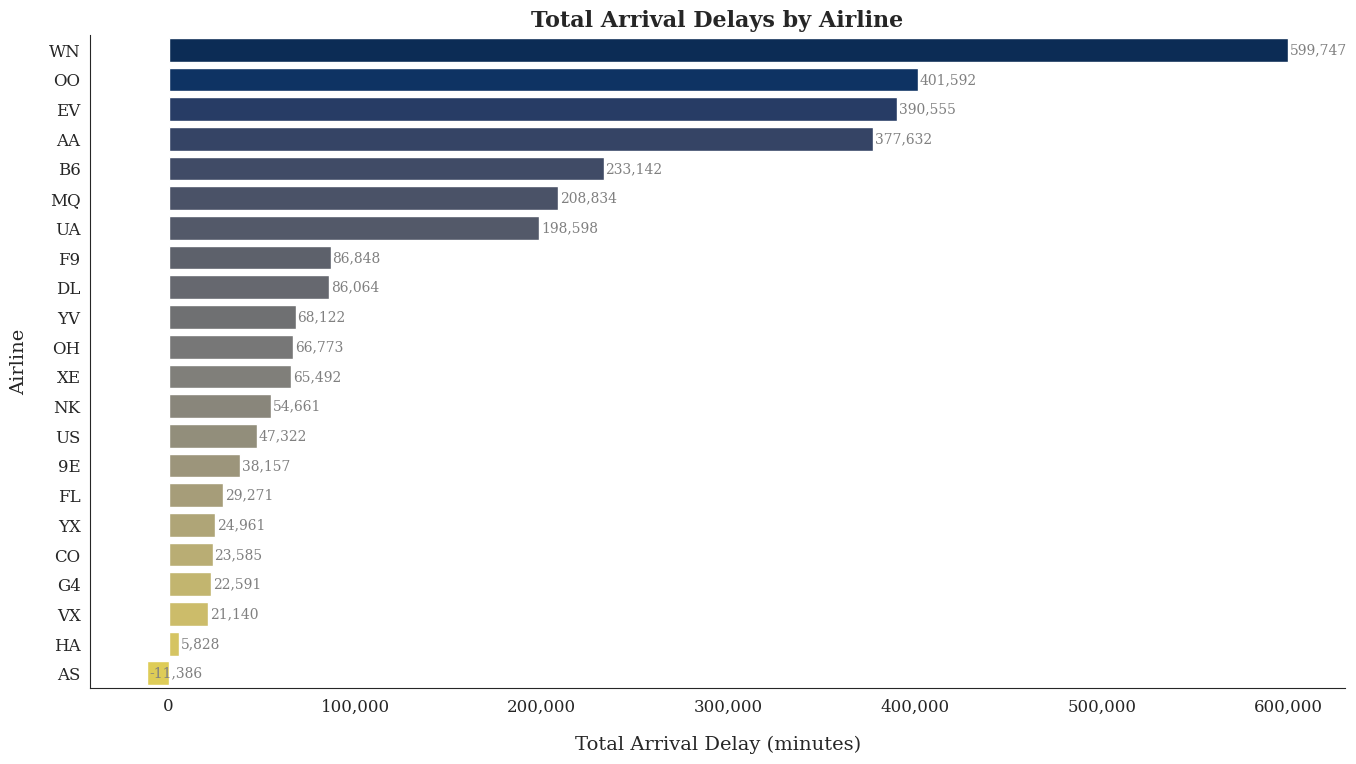

In [6]:
# Define your data (same as before)
df_ArrDelay = df[df.ArrDelay.notnull()]
df_depart_delay = df[df.DepDelay.notnull()]
delays_carrier = df_ArrDelay.groupby('Reporting_Airline').ArrDelay.sum().sort_values(ascending=False)

# Set a professional style
sns.set_style("white")  # Clean white 
plt.rcParams['font.family'] = 'serif' # Use serif font for a more professional look

# Choose a professional color palette (more distinct colors)
palette = sns.color_palette("cividis", len(delays_carrier)) # Or "viridis", "magma"

# Create the figure and axes
fig, ax = plt.subplots(figsize=(14, 8)) # Wider figure for better label spacing

# Horizontal bar plot with improved styling
sns.barplot(y=delays_carrier.index, 
            x=delays_carrier.values, 
            palette=palette, 
            hue=delays_carrier.index,  # Add the hue argument!
            ax=ax,
            legend=False)

# Add thousands separators to x-axis for readability (if needed)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Improved labels and title
ax.set_xlabel("Total Arrival Delay (minutes)", fontsize=14, labelpad=15) # Increased font size, added padding
ax.set_ylabel("Airline", fontsize=14, labelpad=15) # Increased font size, added padding
ax.set_title('Total Arrival Delays by Airline', fontsize=16, fontweight='bold') # Larger, bolder title

# Customize tick labels
ax.tick_params(axis='both', which='major', labelsize=12) # Larger tick labels


# Remove spines (optional - for a cleaner look)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add annotations (values on bars) - Improved placement and formatting
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f"{width:,.0f}", (width + 1000, p.get_y() + p.get_height() / 2),  # Adjust offset as needed
                va='center', ha='left', fontsize=10, color='gray') # Added thousands separator to annotation

# Tight layout and show
plt.tight_layout(pad=2) # Add padding to prevent labels from overlapping
plt.show()


## Comparative Carrier Performance: A Decade of Delays

A comparative analysis of carrier performance over the past decade demonstrates that United Airlines (CO) and Frontier Airlines (F9) had the highest proportion of delayed flights.

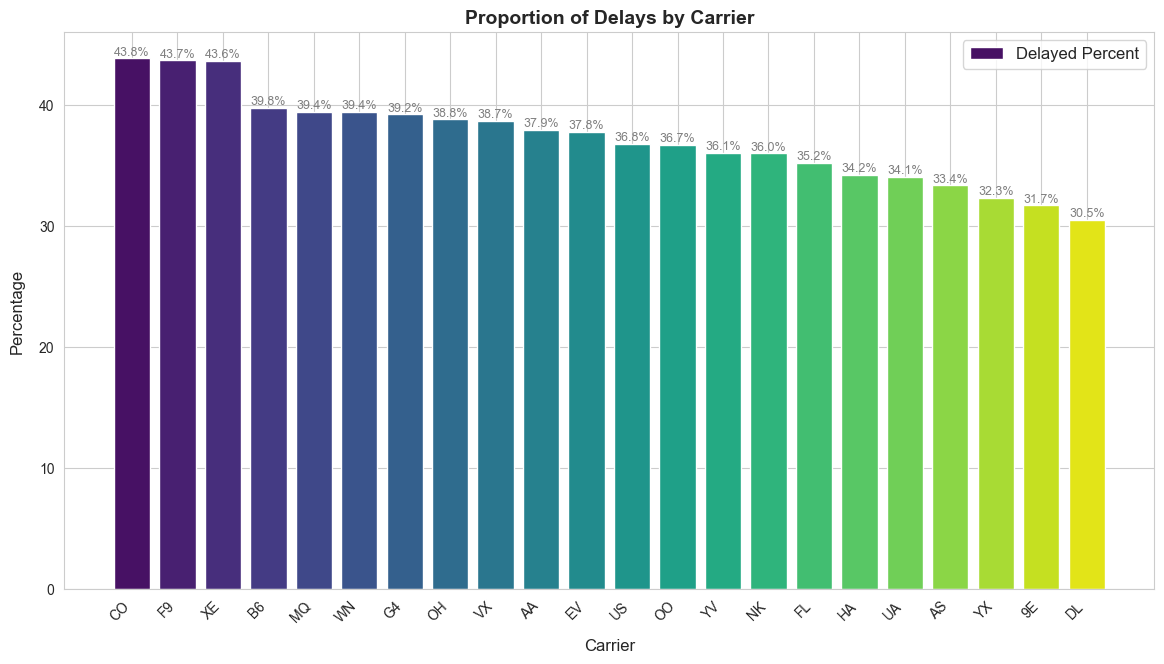

In [7]:
# Prepare the data
arrival_delayed = df.query('Cancelled == 0 and ArrDelay > 0') \
    .groupby('Reporting_Airline') \
    .size() \
    .reset_index(name='delayed_flights')
uncancelled_flights = df.query('Cancelled == 0') \
    .groupby('Reporting_Airline') \
    .size() \
    .reset_index(name='total_flights')
df_merged_delay = pd.merge(arrival_delayed, uncancelled_flights, on='Reporting_Airline')
df_merged_delay['delayed_percent'] = (df_merged_delay['delayed_flights'] / df_merged_delay['total_flights']) * 100
df_merged_delay['on_time_percent'] = 100 - df_merged_delay['delayed_percent']
df_merged_delay = df_merged_delay.sort_values(by='delayed_percent', ascending=False)

# Prepare the data
arrival_delayed = df.query('Cancelled == 0 and ArrDelay > 0') \
    .groupby('Reporting_Airline') \
    .size() \
    .reset_index(name='delayed_flights')
uncancelled_flights = df.query('Cancelled == 0') \
    .groupby('Reporting_Airline') \
    .size() \
    .reset_index(name='total_flights')
df_merged_delay = pd.merge(arrival_delayed, uncancelled_flights, on='Reporting_Airline')
df_merged_delay['delayed_percent'] = (df_merged_delay['delayed_flights'] / df_merged_delay['total_flights']) * 100
df_merged_delay['on_time_percent'] = 100 - df_merged_delay['delayed_percent']
df_merged_delay = df_merged_delay.sort_values(by='delayed_percent', ascending=False)


# Set the style
sns.set_style("whitegrid") 

# Choose a color palette
palette = sns.color_palette("viridis", len(df_merged_delay)) # Or other suitable palette

# Create the figure and axes
fig, ax = plt.subplots(figsize=(12, 7))  # Increased size for labels

# Bar plot for delayed percentage
ax.bar(df_merged_delay['Reporting_Airline'], df_merged_delay['delayed_percent'], color=palette, label='Delayed Percent')



# Improved Labels and Title
ax.set_xlabel('Carrier', fontsize=12, labelpad=10)
ax.set_ylabel('Percentage', fontsize=12, labelpad=10)
ax.set_title('Proportion of Delays by Carrier', fontsize=14, fontweight='bold')

# Rotate x-axis labels if needed
plt.xticks(rotation=45, ha='right')  # Rotate for readability

# Add Legend
ax.legend(fontsize=12)

# Add annotations (values on bars)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=9, color='gray')

plt.tight_layout(pad=2)
plt.show()




## Key Drivers of Delays: Weather and Late Aircraft

Weather and late aircraft emerged as the most significant causes of flight delays during the analyzed period.  The variability in weather-related delays can be attributed to the inherent unpredictability of weather conditions.

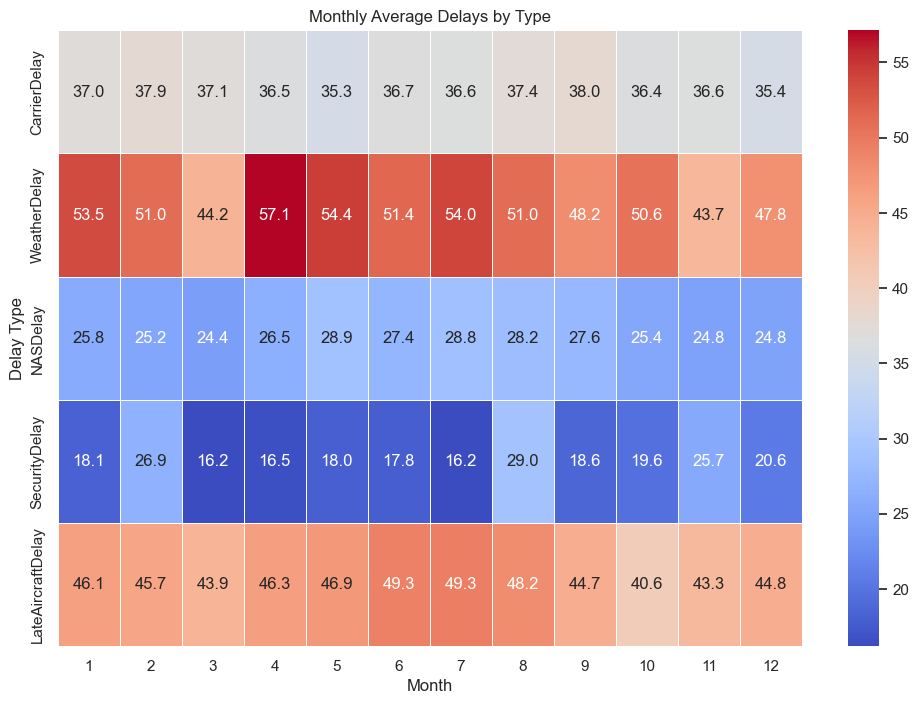

In [8]:
# Prepare the data
carrier_by_Month = df.query('CarrierDelay > 0').groupby('Month')['CarrierDelay'].mean().reset_index()
weather_by_Month = df.query('WeatherDelay > 0').groupby('Month')['WeatherDelay'].mean().reset_index()
nas_by_Month = df.query('NASDelay > 0').groupby('Month')['NASDelay'].mean().reset_index()
security_by_Month = df.query('SecurityDelay > 0').groupby('Month')['SecurityDelay'].mean().reset_index()
lateaircraft_by_Month = df.query('LateAircraftDelay > 0').groupby('Month')['LateAircraftDelay'].mean().reset_index()

# Merge the data
delays_by_Month = (
    carrier_by_Month
    .merge(weather_by_Month, on='Month')
    .merge(nas_by_Month, on='Month')
    .merge(security_by_Month, on='Month')
    .merge(lateaircraft_by_Month, on='Month')
)

# Set the index to Month for better heatmap visualization
delays_by_Month.set_index('Month', inplace=True)

# Define delay types and colors
DelayTypes = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']

# Set the style to a dark grid background
sns.set(style="darkgrid")

# Create the figure
plt.figure(figsize=(12, 8))

# Heatmap
sns.heatmap(delays_by_Month.transpose(), cmap='coolwarm', annot=True, fmt=".1f", linewidths=.5)

# Labels and Title
plt.xlabel('Month')
plt.ylabel('Delay Type')
plt.title('Monthly Average Delays by Type')

# Show the plot
plt.show()


## Summary of Findings and Conclusions

This investigation yielded the following key insights:

*   A significant proportion of flight cancellations were attributed to weather and aircraft-related problems.
*   Southwest Airlines (WN) demonstrated the lowest performance in terms of both cancellations and arrival delays, suggesting potential areas for operational improvement.
*   The analysis highlights the substantial influence of weather on flight delays, emphasizing the need for airlines to develop robust strategies for mitigating weather-related disruptions.

In [9]:
!jupyter nbconvert slides.ipynb --to slides --no-input --no-prompt


[NbConvertApp] Converting notebook slides.ipynb to slides
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 608641 bytes to slides.slides.html
